In [1]:
# 🍔 Five Guys Manchester — Sales, Profit, and Demographic Analytics
# Jupyter Notebook

# 1) Import the python libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Load or simulate the data
# In real usage, change this to pd.read_csv('path/to/your_data.csv')
np.random.seed(42)
dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq="H")

data = pd.DataFrame({
    "timestamp": dates,
    "transactions": np.random.randint(5, 50, size=len(dates)),
    "avg_check": np.random.uniform(8.0, 18.0, size=len(dates)),   # £ per check
    "food_cost_pct": np.random.uniform(28, 38, size=len(dates)),  # %
    "seats_used": np.random.randint(10, 50, size=len(dates)),
})

# Simulate menu items sold and item prices
menu_items = ["Cheeseburger","Bacon Burger","Hot Dog","Fries","Shake"]
prices = {"Cheeseburger":8.5,"Bacon Burger":9.5,"Hot Dog":7.0,"Fries":3.5,"Shake":4.5}
data["item_sold"] = np.random.choice(menu_items, size=len(dates))
data["item_price"] = data["item_sold"].apply(lambda x: prices[x])

# Demographics (simulated)
age_groups = ["<18","18-30","30-45","45-60","60+"]
data["age_group"] = np.random.choice(age_groups, size=len(dates), p=[0.10,0.35,0.30,0.15,0.10])
data["customer_rating"] = np.random.choice([1,2,3,4,5], size=len(dates), p=[0.05,0.10,0.20,0.30,0.35])

# Create revenue and profit columns
data["revenue"] = data["transactions"] * data["avg_check"]
data["food_cost"] = data["revenue"] * (data["food_cost_pct"]/100)
data["profit"] = data["revenue"] - data["food_cost"]

data.head()

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_79245/313013802.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq="H")


,timestamp,transactions,avg_check,food_cost_pct,seats_used,item_sold,item_price,age_group,customer_rating,revenue,food_cost,profit
0,2025-01-01 00:00:00,43,17.197926,30.052339,37,Hot Dog,7.0,30-45,4,739.510806,222.240296,517.270510
1,2025-01-01 01:00:00,33,8.948492,34.953294,23,Hot Dog,7.0,30-45,3,295.300234,103.217159,192.083075
2,2025-01-01 02:00:00,19,13.441260,35.411070,48,Hot Dog,7.0,45-60,5,255.383940,90.434187,164.949753
3,2025-01-01 03:00:00,47,15.405095,30.590982,12,Shake,4.5,18-30,5,724.039475,221.490786,502.548689
4,2025-01-01 04:00:00,12,15.569268,31.440998,20,Bacon Burger,9.5,30-45,5,186.831221,58.741600,128.089621


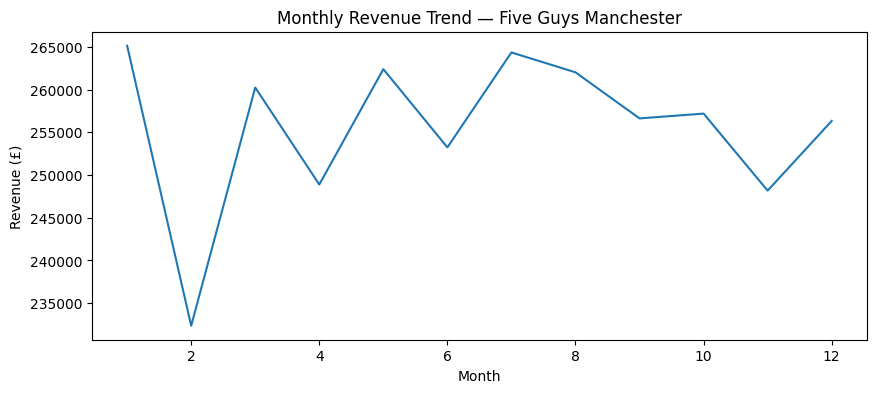

In [2]:
# Total revenue by month
data["month"] = data["timestamp"].dt.month
monthly_revenue = data.groupby("month")["revenue"].sum()

plt.figure(figsize=(10,4))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title("Monthly Revenue Trend — Five Guys Manchester")
plt.ylabel("Revenue (£)")
plt.xlabel("Month")
plt.show()

In [3]:
# Best-selling items by count
item_counts = data["item_sold"].value_counts()

# Avg check and profit margin by item
menu_summary = data.groupby("item_sold").agg({
    "item_price": "mean",
    "revenue": "sum",
    "profit": "sum"
}).sort_values(by="revenue", ascending=False)

display(menu_summary)

,item_price,revenue,profit
item_sold,,,
Bacon Burger,9.5,644334.586460,430232.039440
Fries,3.5,637402.854599,426427.201552
Shake,4.5,596425.999047,399413.962908
Cheeseburger,8.5,595607.152593,397866.691282
Hot Dog,7.0,593209.892753,397338.759127


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_79245/1660767771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hr_revpash.index, y=hr_revpash.values, palette="magma")


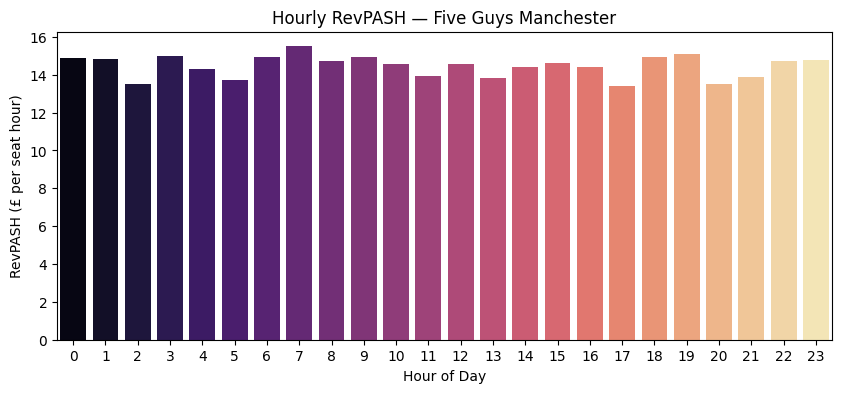

In [4]:
# Revenue per Available Seat Hour (RevPASH)
data["revpash"] = data["revenue"] / data["seats_used"]

# Average RevPASH by hour of day
data["hour"] = data["timestamp"].dt.hour
hr_revpash = data.groupby("hour")["revpash"].mean()

plt.figure(figsize=(10,4))
sns.barplot(x=hr_revpash.index, y=hr_revpash.values, palette="magma")
plt.title("Hourly RevPASH — Five Guys Manchester")
plt.ylabel("RevPASH (£ per seat hour)")
plt.xlabel("Hour of Day")
plt.show()

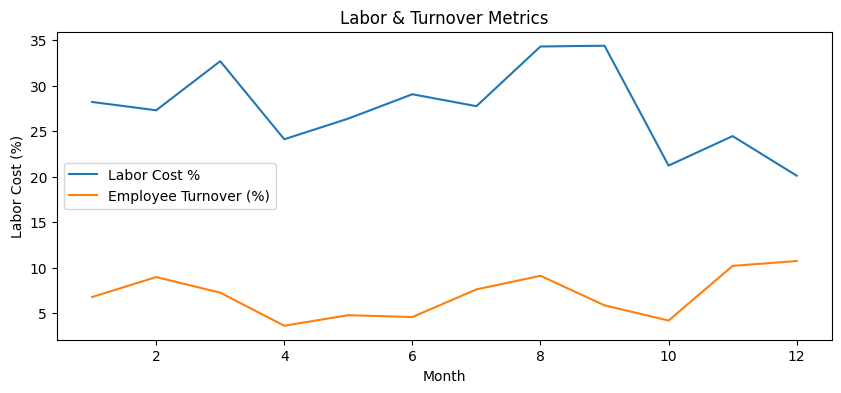

In [5]:
# Generate simulated staffing data
staff_df = pd.DataFrame({
    "month": list(range(1,13)),
    "labor_cost_pct": np.random.uniform(20, 35, size=12),   # % of revenue
    "employee_turnover": np.random.uniform(3, 12, size=12), # monthly turnover
})

# Plot labour cost
fig, ax1 = plt.subplots(figsize=(10,4))
sns.lineplot(x="month", y="labor_cost_pct", data=staff_df, ax=ax1, label="Labor Cost %")
ax1.set_ylabel("Labor Cost (%)")
ax1.set_title("Labor & Turnover Metrics")
sns.lineplot(x="month", y="employee_turnover", data=staff_df, ax=ax1, label="Employee Turnover (%)")
plt.xlabel("Month")
plt.legend()
plt.show()